<a href="https://colab.research.google.com/github/jchen8000/MachineLearning/blob/master/Linear%20Regression/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

In [0]:
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams

## 1. Boston Dataset

### 1.1 Boston Data Details

In [0]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
print(boston.keys())
print(boston.data.shape)
print(boston.feature_names)
print(boston.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Bos

In [4]:
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE'] = boston.target
print(bos.head())
print(bos.describe())

      CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  PRICE
0  0.00632  18.0   2.31   0.0  0.538  ...  296.0     15.3  396.90   4.98   24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242.0     17.8  396.90   9.14   21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  242.0     17.8  392.83   4.03   34.7
3  0.03237   0.0   2.18   0.0  0.458  ...  222.0     18.7  394.63   2.94   33.4
4  0.06905   0.0   2.18   0.0  0.458  ...  222.0     18.7  396.90   5.33   36.2

[5 rows x 14 columns]
             CRIM          ZN       INDUS  ...           B       LSTAT       PRICE
count  506.000000  506.000000  506.000000  ...  506.000000  506.000000  506.000000
mean     3.613524   11.363636   11.136779  ...  356.674032   12.653063   22.532806
std      8.601545   23.322453    6.860353  ...   91.294864    7.141062    9.197104
min      0.006320    0.000000    0.460000  ...    0.320000    1.730000    5.000000
25%      0.082045    0.000000    5.190000  ...  375.377500    6.950000   17.025000

## 2. Linear Regression from scratch

### 2.1 Cost Function and Gradient Descent

> The **hypothesis** of Linear Regression is:  

>> $ h_\theta(x) =  \theta_0 +  \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n $

>> Or: $ h_\theta(x)  =  \theta ^ T x $

> The **Cost Function** is:

>> $ J( \theta ) = \frac{\mathrm{1} }{2m}  \sum_{i=1}^{m} (h_ \theta (x^i) - y^i )^2 +    \frac{\mathrm{\lambda} }{2m} \sum_{j=1}^{n} \theta_j^2   $

> The **Gradient Descent** is the partial derivative of the cost function, as below:

>> $  \frac{\partial J( \theta ) }{\partial \theta_0} = \frac{\mathrm{1} }{m}  \sum_{i=1}^{m} ( h_\theta(x^i) - y^i ) x^i_0  $  (where j = 0)

>> $  \frac{\partial J( \theta ) }{\partial \theta_j} = \frac{\mathrm{1} }{m}  \sum_{i=1}^{m} ( h_\theta(x^i) - y^i ) x^i_j  + \frac{\mathrm{\lambda} }{m} \sum_{j=1}^{n} \theta_j$ (where j >= 1)

In [0]:
def prediction(X, theta):
    return X @ theta

def costFunction(X, y, theta, lmbda):
    temp = prediction(X, theta) - y
    return np.sum(np.power(temp, 2)) / (2*len(X)) + np.sum(theta[1:]**2) * lmbda / (2*len(X))
  
def gradientDescent(X, y, theta, alpha, lmbda, iterations):
    cost_history = [] #Used to plot cost as function of iteration
    theta_history = [] #Used to visualize the minimization path later on
    m = len(y)
    for _ in range(iterations):
        temp = prediction(X, theta) - y
        temp = X.T @ temp
        theta = theta - (alpha/m) * temp
        theta = theta + theta * lmbda / m
        theta[0] = theta[0] - theta[0] * lmbda / m
        theta_history.append(list(theta[:,0]))
        cost_history.append(costFunction(X, y, theta, lmbda))
    return theta, cost_history, theta_history


### 2.2 Feature Scaling and Add Bias vector

In [0]:
from sklearn.preprocessing import StandardScaler

X = boston.data
y = boston.target

sc = StandardScaler()
X = sc.fit_transform(X)

m = X.shape[0]
X = np.hstack((np.ones((m,1)), X))

#y shape looks like (m,), make it looks like (m,1)
#the below gradientDescent function requires it to be like (m,1)
y = y[:,np.newaxis]

### 2.2 Split the train and test data

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(X.shape)
print(y.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(506, 14)
(506, 1)
(404, 14) (404, 1)
(102, 14) (102, 1)


### 2.3 Compute initial cost

In [8]:
m, n = X_train.shape
theta = np.zeros([n,1])
iterations = 500
alpha = 0.02
lmbda = 0.01


J = costFunction(X_train, y_train, theta, lmbda)
print(J)

298.2204455445544


### 2.4 Run Gradient Descent

In [0]:
theta, cost_history, theta_history = gradientDescent(X_train, y_train, theta, alpha, lmbda, iterations)


### 2.5 Final Cost ans Predictions

In [10]:
J = costFunction(X_train, y_train, theta, lmbda)

y_pred = prediction(X_test, theta)
R2_score = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Final Cost: ", J)
print("MSE: ", mse)
print("R2 Score:", R2_score)

Final Cost:  9.75897639413963
MSE:  34.61327922801189
R2 Score: 0.57492395007474


### 2.6 Plot Results

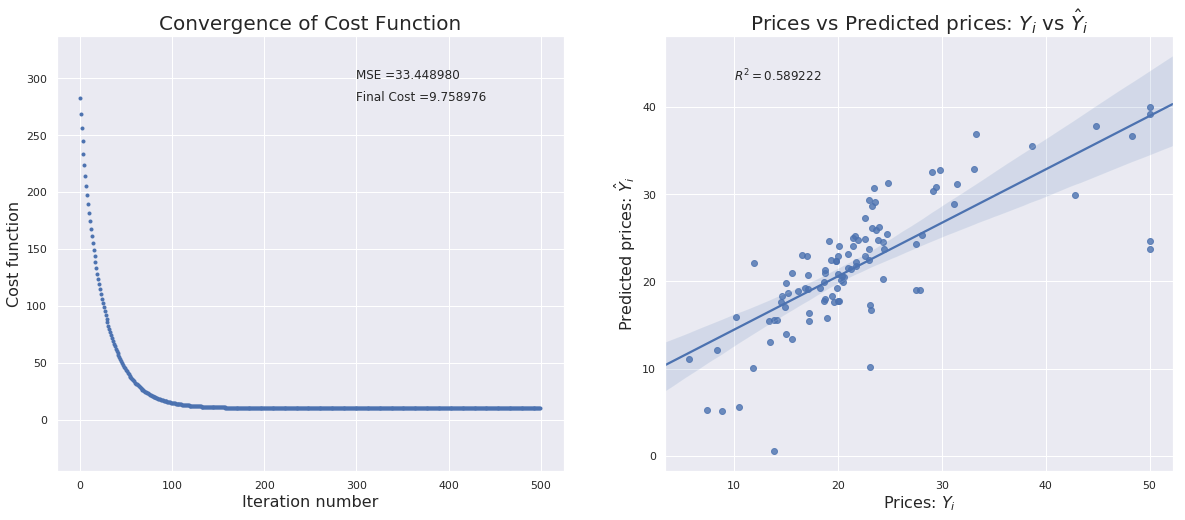

In [33]:
fig = plt.figure(1, figsize=(20,8))

plt.subplot(1, 2, 1)
plt.plot(range(len(cost_history)),cost_history,'b.')
plt.grid(True)
plt.text(300,300, "MSE =%f" % mse, fontsize=12)
plt.text(300,280, "Final Cost =%f" % J, fontsize=12)
plt.title("Convergence of Cost Function", fontsize=20)
plt.xlabel("Iteration number", fontsize=16)
plt.ylabel("Cost function", fontsize=16)
dummy = plt.xlim([-0.05*iterations,1.05*iterations])
dummy = plt.ylim([min(cost_history)-0.2*(max(cost_history)-min(cost_history)), max(cost_history)+0.2*(max(cost_history)-min(cost_history))])
    
  
plt.subplot(1, 2, 2)
sns.set(color_codes=True)
plt.text(10,43, "$R^2 = $%f" % R2_score, fontsize=12)
ax = sns.regplot(x=y_test, y=y_pred.reshape(y_pred.shape[0]), color="b")
ax.set_title( "Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$", fontsize=20 )
ax.set_ylabel("Predicted prices: $\hat{Y}_i$", fontsize=16)
ax.set_xlabel("Prices: $Y_i$", fontsize=16)


plt.show()

## 3. Linear Regression with sklearn

In [0]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)




In [13]:
mse = mean_squared_error(y_test, y_pred)
R2_score = r2_score(y_test, y_pred)

print("MSE: ", mse)
print("R2 Score:", R2_score)

MSE:  33.44897999767657
R2 Score: 0.5892223849182503
